In [35]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [36]:
quickTKMPIRandom = th.Thicket.from_caliperreader(glob('dataFiles/MPI/QuickSort/random/cali/*.cali'))
quickTKMPISorted = th.Thicket.from_caliperreader(glob('dataFiles/MPI/QuickSort/sorted/cali/*.cali'))
quickTKMPIReverse = th.Thicket.from_caliperreader(glob('dataFiles/MPI/QuickSort/reverse-sorted/cali/*.cali'))
quickTKMPIPerturbed = th.Thicket.from_caliperreader(glob('dataFiles/MPI/QuickSort/1%-perturbed/cali/*.cali'))

quickTKCUDARandom = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/QuickSort/random/*.cali'))
quickTKCUDASorted = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/QuickSort/sorted/*.cali'))
quickTKCUDAReverse = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/QuickSort/reverse-sorted/*.cali'))
# quickTKCUDAPerturbed = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/quick/perturbed/*.cali'))

In [37]:
quickTKCUDASorted.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,
76386902,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,1701994315,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./quicksort_cuda, 65536, 64, 1]",g,quicksort,CUDA,int,4,65536,Sorted,64,1,23,online
883808810,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,1701986310,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./quicksort_cuda, 262144, 1024, 1]",g,quicksort,CUDA,int,4,262144,Sorted,1024,16,23,online
1387736111,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,1701984383,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./quicksort_cuda, 262144, 128, 1]",g,quicksort,CUDA,int,4,262144,Sorted,128,2,23,online
1741992123,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,1701984382,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./quicksort_cuda, 262144, 512, 1]",g,quicksort,CUDA,int,4,262144,Sorted,512,8,23,online
1828161487,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,1701994691,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./quicksort_cuda, 65536, 512, 1]",g,quicksort,CUDA,int,4,65536,Sorted,512,8,23,online
2999518409,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,1701994815,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./quicksort_cuda, 65536, 1024, 1]",g,quicksort,CUDA,int,4,65536,Sorted,1024,16,23,online
3126715680,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,1701994553,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./quicksort_cuda, 65536, 256, 1]",g,quicksort,CUDA,int,4,65536,Sorted,256,4,23,online
3573906556,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,1701994434,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./quicksort_cuda, 65536, 128, 1]",g,quicksort,CUDA,int,4,65536,Sorted,128,2,23,online
3610023787,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,1701984382,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./quicksort_cuda, 262144, 256, 1]",g,quicksort,CUDA,int,4,262144,Sorted,256,4,23,online


Clean up the quick data

In [38]:
quickMPIData = [quickTKMPIRandom, quickTKMPISorted, quickTKMPIReverse, quickTKMPIPerturbed]
quickMPIDataClean = []

for i in range(len(quickMPIData)):
    quickGB = quickMPIData[i].groupby("InputSize")

    quickCtk = th.Thicket.concat_thickets(
        thickets=list(quickGB.values()),
        headers=list(quickGB.keys()),
        axis="columns",
        metadata_key="num_procs"
    )

    remove_list = [("node", "")]
    values = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]
    for val in values:
        remove_list.append((val, "nid"))
        remove_list.append((val, "spot.channel"))
        remove_list.append((val, "Total time"))

    quickCtk.dataframe = quickCtk.dataframe.reset_index().drop(remove_list, axis=1)
    quickMPIDataClean.append(quickCtk)

quickCUDAData = [quickTKCUDASorted]
quickCUDADataClean = []

quickGB = quickTKCUDASorted.groupby("InputSize")
quickCtk = th.Thicket.concat_thickets(
    thickets=list(quickGB.values()),
    headers=list(quickGB.keys()),
    axis="columns",
    metadata_key="num_threads"
)

remove_list = [("node", "")]
values = [2**16, 2**18]
for val in values:
    remove_list.append((val, "nid"))
    remove_list.append((val, "spot.channel"))
    remove_list.append((val, "Total time"))

quickCtk.dataframe = quickCtk.dataframe.reset_index().drop(remove_list, axis=1)
quickCUDADataClean.append(quickCtk)

7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x17d5cc790>, 262144: <thicket.thicket.Thicket object at 0x17d2f0a10>, 1048576: <thicket.thicket.Thicket object at 0x17d4a0110>, 4194304: <thicket.thicket.Thicket object at 0x17d182610>, 16777216: <thicket.thicket.Thicket object at 0x17d2a7ed0>, 67108864: <thicket.thicket.Thicket object at 0x17d2b9210>, 268435456: <thicket.thicket.Thicket object at 0x17d4b5890>}
7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x17d4bc610>, 262144: <thicket.thicket.Thicket object at 0x17d43f190>, 1048576: <thicket.thicket.Thicket object at 0x17d4c2c10>, 4194304: <thicket.thicket.Thicket object at 0x17ced3bd0>, 16777216: <thicket.thicket.Thicket object at 0x17d4efe10>, 67108864: <thicket.thicket.Thicket object at 0x17d4214d0>, 268435456: <thicket.thicket.Thicket object at 0x17d11a950>}
7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x17d44b350>, 262144: <thicket.thicket.Thicket object at 0x17d108590>, 1

Collect desired regions for plotting

In [39]:
# Data for main
quickMPIRandomMain = quickMPIDataClean[0].dataframe.loc[quickMPIDataClean[0].dataframe['name'] == 'main']
quickMPISortedMain = quickMPIDataClean[1].dataframe.loc[quickMPIDataClean[1].dataframe['name'] == 'main']
quickMPIReverseMain = quickMPIDataClean[2].dataframe.loc[quickMPIDataClean[2].dataframe['name'] == 'main']
quickMPIPerturbedMain = quickMPIDataClean[3].dataframe.loc[ quickMPIDataClean[3].dataframe['name'] == 'main']

# Data for comm
quickMPIRandomComm = quickMPIDataClean[0].dataframe.loc[quickMPIDataClean[0].dataframe['name'] == 'comm']
quickMPISortedComm = quickMPIDataClean[1].dataframe.loc[quickMPIDataClean[1].dataframe['name'] == 'comm']
quickMPIReverseComm = quickMPIDataClean[2].dataframe.loc[quickMPIDataClean[2].dataframe['name'] == 'comm']
quickMPIPerturbedComm = quickMPIDataClean[3].dataframe.loc[ quickMPIDataClean[3].dataframe['name'] == 'comm']

# Data for comp
quickMPIRandomComp = quickMPIDataClean[0].dataframe.loc[quickMPIDataClean[0].dataframe['name'] == 'comp_large']
quickMPISortedComp = quickMPIDataClean[1].dataframe.loc[quickMPIDataClean[1].dataframe['name'] == 'comp_large']
quickMPIReverseComp = quickMPIDataClean[2].dataframe.loc[quickMPIDataClean[2].dataframe['name'] == 'comp_large']
quickMPIPerturbedComp = quickMPIDataClean[3].dataframe.loc[quickMPIDataClean[3].dataframe['name'] == 'comp_large']

algosMain = {'quickMPIRandom': quickMPIRandomMain, 'quickMPISorted': quickMPISortedMain, 'quickMPIReverse': quickMPIReverseMain,
            'quickMPIPerturbed': quickMPIPerturbedMain}

algosComm = {'quickMPIRandom': quickMPIRandomComm, 'quickMPISorted': quickMPISortedComm, 'quickMPIReverse': quickMPIReverseComm,
            'quickMPIPerturbed': quickMPIPerturbedComm}

algosComp = {'quickMPIRandom': quickMPIRandomComp, 'quickMPISorted': quickMPISortedComp, 'quickMPIReverse': quickMPIReverseComp,
            'quickMPIPerturbed': quickMPIPerturbedComp}

# Data for main
# quickCUDARandomMain = quickCUDADataClean[0].dataframe.loc[quickCUDADataClean[0].dataframe['name'] == 'main']
quickCUDASortedMain = quickCUDADataClean[0].dataframe.loc[quickCUDADataClean[0].dataframe['name'] == 'main']
# quickCUDAReverseMain = quickCUDADataClean[2].dataframe.loc[quickCUDADataClean[2].dataframe['name'] == 'main']
# quickCUDAPerturbedMain = quickCUDADataClean[3].dataframe.loc[quickCUDADataClean[3].dataframe['name'] == 'main']

# Data for comm
# quickCUDARandomComm = quickCUDADataClean[0].dataframe.loc[quickCUDADataClean[0].dataframe['name'] == 'comm']
quickCUDASortedComm = quickCUDADataClean[0].dataframe.loc[quickCUDADataClean[0].dataframe['name'] == 'comm']
# quickCUDAReverseComm = quickCUDADataClean[2].dataframe.loc[quickCUDADataClean[2].dataframe['name'] == 'comm']
# quickCUDAPerturbedComm = quickCUDADataClean[3].dataframe.loc[quickCUDADataClean[3].dataframe['name'] == 'comm']

# Data for comp
# quickCUDARandomComp = quickCUDADataClean[0].dataframe.loc[quickCUDADataClean[0].dataframe['name'] == 'comp_large']
quickCUDASortedComp = quickCUDADataClean[0].dataframe.loc[quickCUDADataClean[0].dataframe['name'] == 'comp_large']
# quickCUDAReverseComp = quickCUDADataClean[2].dataframe.loc[quickCUDADataClean[2].dataframe['name'] == 'comp_large']
# quickCUDAPerturbedComp = quickCUDADataClean[3].dataframe.loc[quickCUDADataClean[3].dataframe['name'] == 'comp_large']

algosMainCUDA = {'quickCUDASorted': quickCUDASortedMain}

algosCommCUDA = {'quickCUDASorted': quickCUDASortedComm}

algosCompCUDA = {'quickCUDASorted': quickCUDASortedComp}

display(quickCUDADataClean[0].dataframe)

num_threads         65536                                    262144  \
               Min time/rank Max time/rank Avg time/rank Min time/rank   
0           64    116.134183    116.134183    116.134183   1984.477498   
1          128    116.129655    116.129655    116.129655   2000.442238   
2          256    116.781999    116.781999    116.781999   1986.763888   
3          512    117.985619    117.985619    117.985619   2017.548626   
4         1024    119.164631    119.164631    119.164631   2063.003135   
5           64      0.000334      0.000334      0.000334      0.000955   
6          128      0.000320      0.000320      0.000320      0.000687   
7          256      0.000336      0.000336      0.000336      0.000939   
8          512      0.000322      0.000322      0.000322      0.000957   
9         1024      0.000315      0.000315      0.000315      0.002459   
10          64      0.000297      0.000297      0.000297      0.000913   
11         128      0.000283      0.000283      0.000283      0.000651   
12         256      0.000298      0.000298      0.000298      0.000896   
13         512      0.000285      0.000285      0.000285      0.000915   
14        1024      0.000282      0.000282      0.000282      0.002364   
15          64      0.000277      0.000277      0.000277      0.000888   
16         128      0.000264      0.000264      0.000264      0.000626   
17         256      0.000279      0.000279      0.000279      0.000874   
18         512      0.000266      0.000266      0.000266      0.000893   
19        1024      0.000262      0.000262      0.000262      0.002327   
20          64      0.001592      0.001592      0.001592      0.001589   
21         128      0.001583      0.001583      0.001583      0.001596   
22         256      0.001597      0.001597      0.001597      0.001580   
23         512      0.001586      0.001586      0.001586      0.001579   
24        1024      0.001594      0.001594      0.001594      0.001758   
25          64      0.001576      0.001576      0.001576      0.001574   
26         128      0.001568      0.001568      0.001568      0.001581   
27         256      0.001583      0.001583      0.001583      0.001567   
28         512      0.001571      0.001571      0.001571      0.001566   
29        1024      0.001580      0.001580      0.001580      0.001737   
30          64      0.000191      0.000191      0.000191      0.000712   
31         128      0.000188      0.000188      0.000188      0.000716   
32         256      0.000186      0.000186      0.000186      0.000688   
33         512      0.000189      0.000189      0.000189      0.000715   
34        1024      0.000184      0.000184      0.000184      0.000707   
35          64      0.000379      0.000379      0.000379      0.001276   
36         128      0.000368      0.000368      0.000368      0.001274   
37         256      0.000371      0.000371      0.000371      0.001291   
38         512      0.000368      0.000368      0.000368      0.001252   
39        1024      0.000367      0.000367      0.000367      0.001661   

                                             name  
   Max time/rank Avg time/rank                     
0    1984.477498   1984.477498               main  
1    2000.442238   2000.442238               main  
2    1986.763888   1986.763888               main  
3    2017.548626   2017.548626               main  
4    2063.003135   2063.003135               main  
5       0.000955      0.000955               comm  
6       0.000687      0.000687               comm  
7       0.000939      0.000939               comm  
8       0.000957      0.000957               comm  
9       0.002459      0.002459               comm  
10      0.000913      0.000913         comm_large  
11      0.000651      0.000651         comm_large  
12      0.000896      0.000896         comm_large  
13      0.000915      0.000915         comm_large  
14      0.002364      0.002364         comm_large  
15      0.

Plot strong scaling

In [40]:
def plot_strong_scaling(algos, num_vals, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    for k in algos.keys():
        dframe = algos[k]
        xvals = dframe['num_procs']
        yvals = dframe[num_vals][time_type]
        ax.plot(xvals, yvals, label=k)
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

MPI

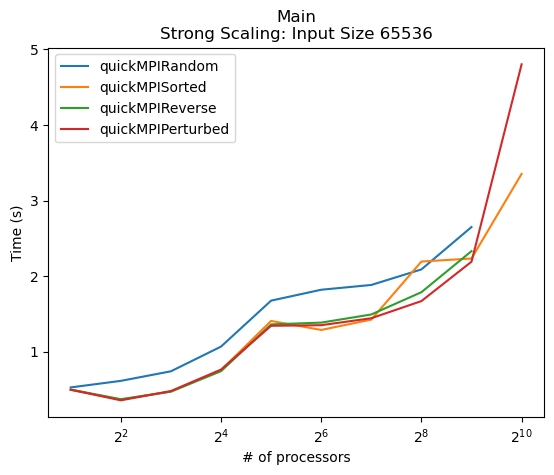

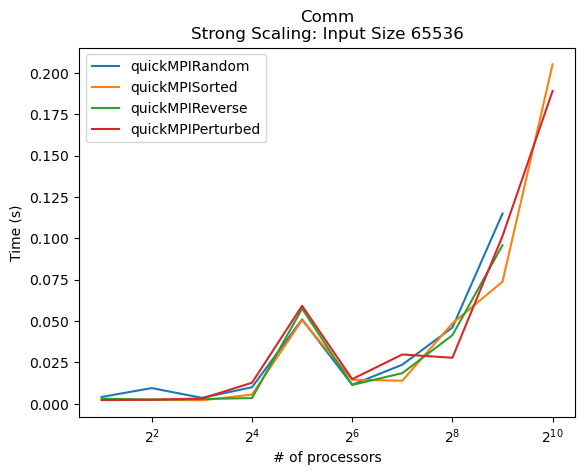

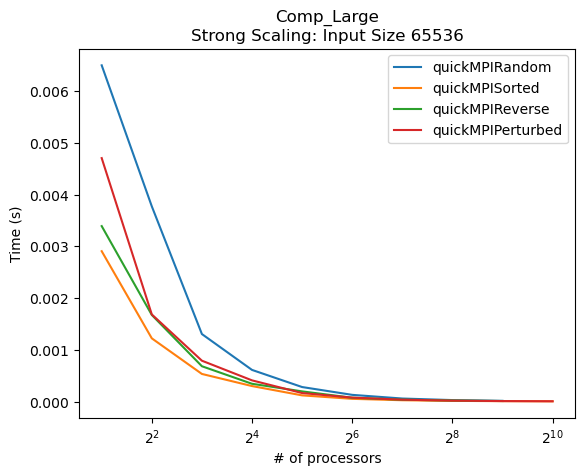

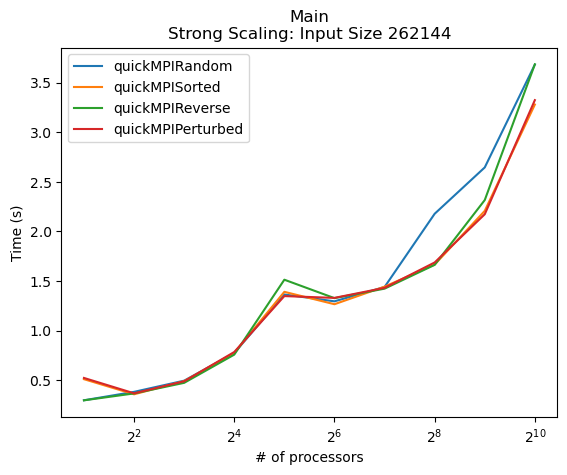

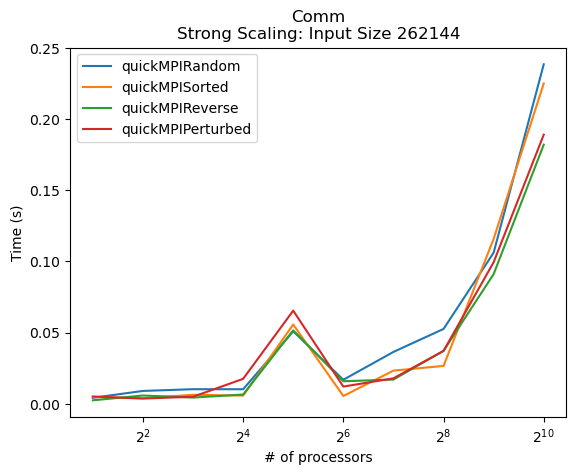

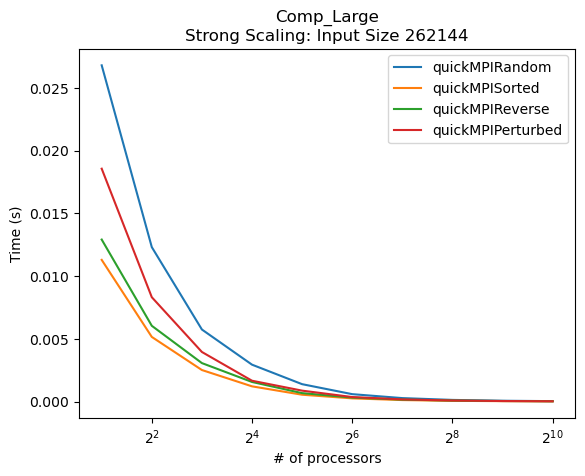

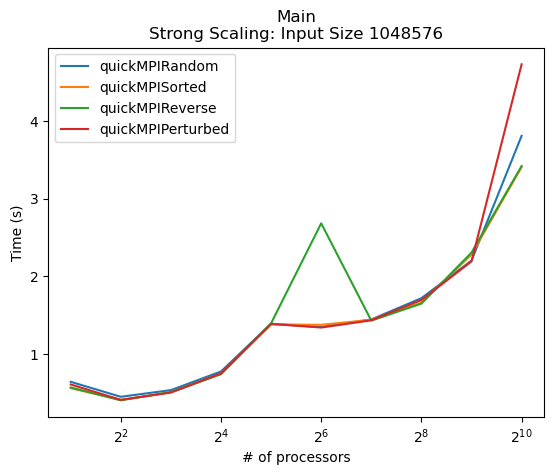

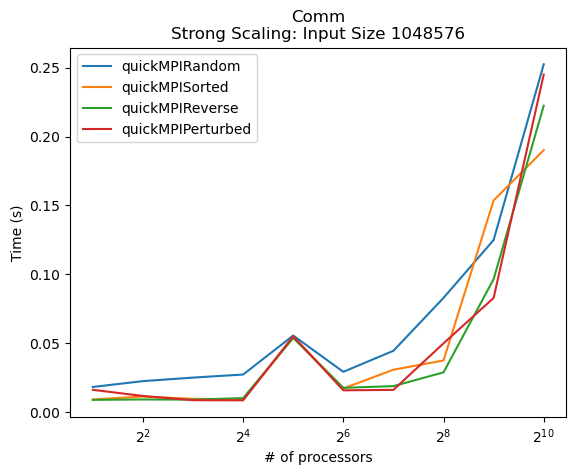

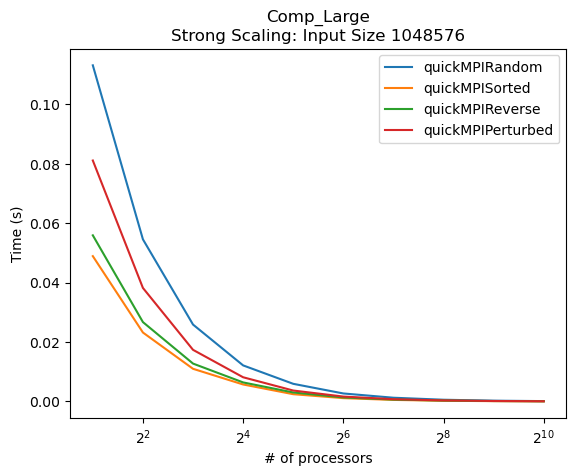

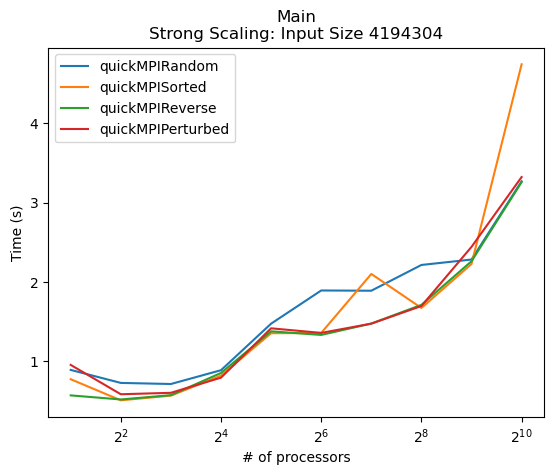

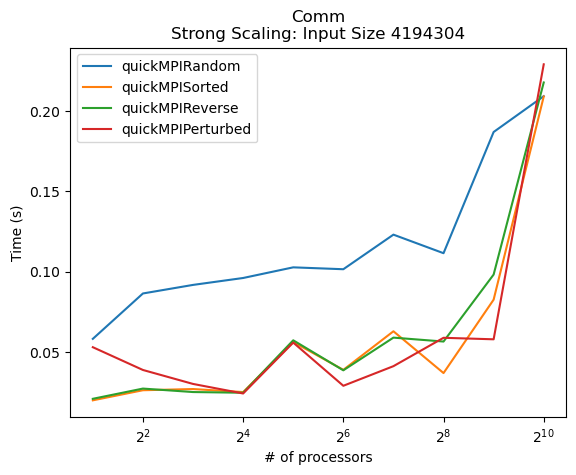

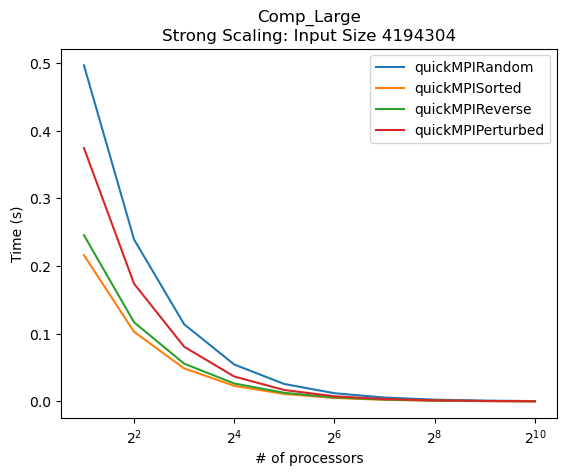

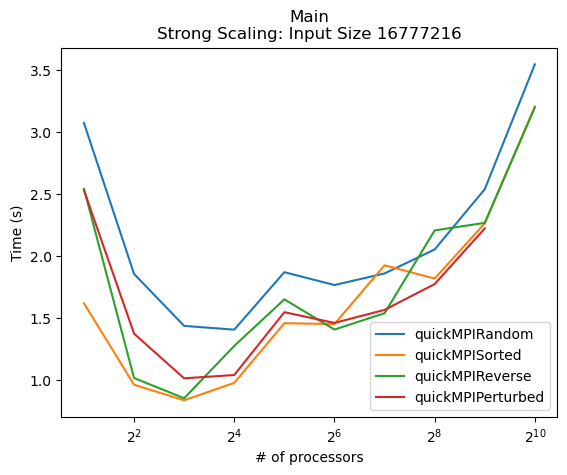

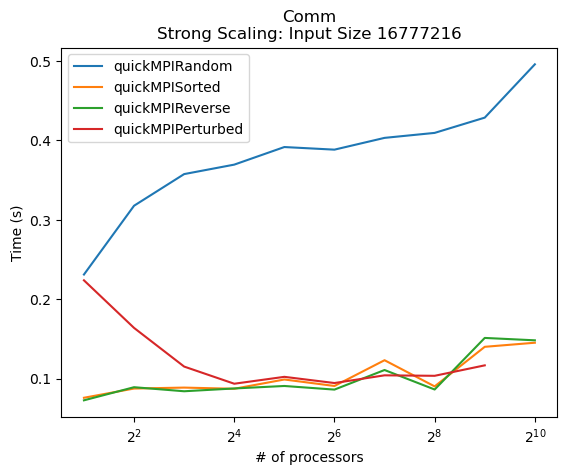

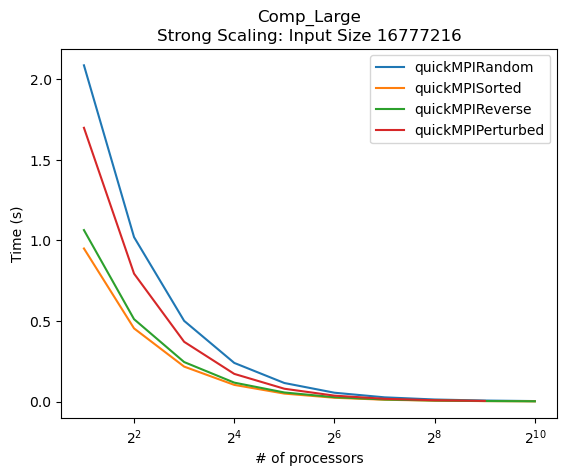

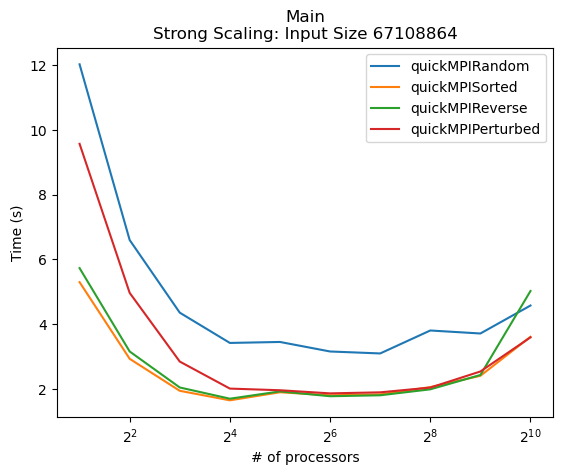

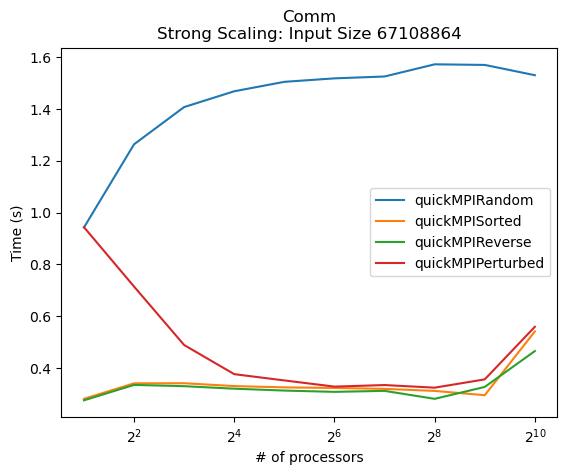

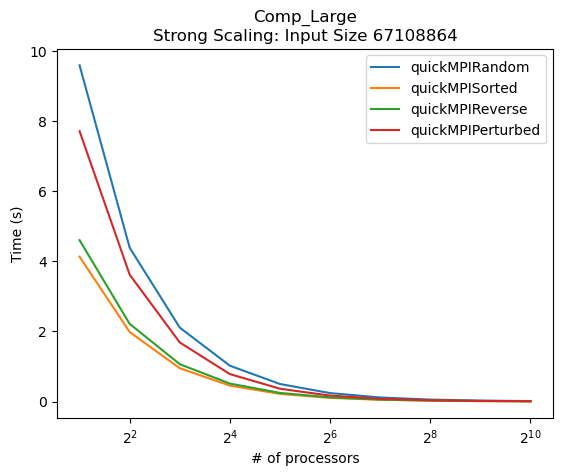

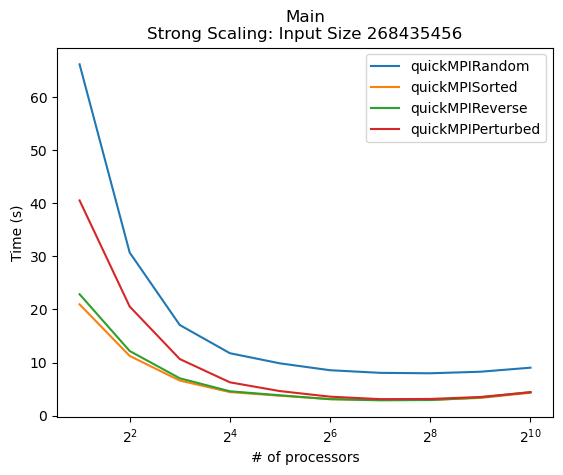

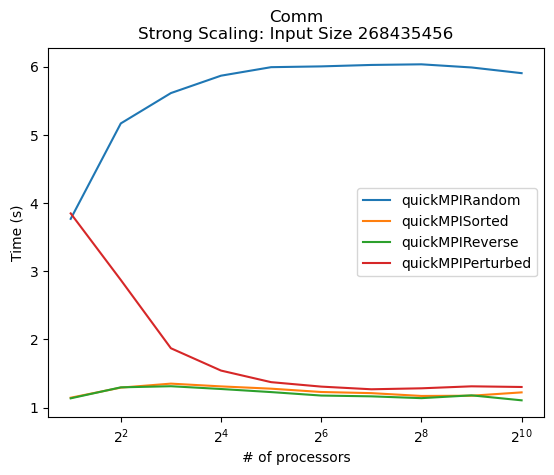

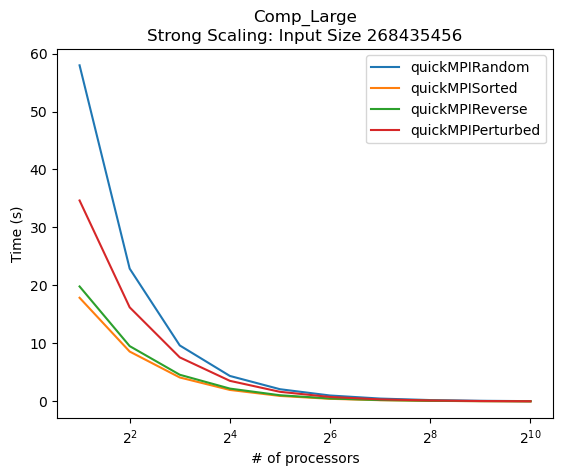

In [41]:
values = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]

for val in values:
    plot_strong_scaling(algosMain, val, 'Avg time/rank', 'Main\nStrong Scaling: Input Size ' + str(val), '# of processors', 'Time (s)')
    plot_strong_scaling(algosComm, val, 'Avg time/rank', 'Comm\nStrong Scaling: Input Size ' + str(val), '# of processors', 'Time (s)')
    plot_strong_scaling(algosComp, val, 'Avg time/rank', 'Comp_Large\nStrong Scaling: Input Size ' + str(val), '# of processors', 'Time (s)')

CUDA

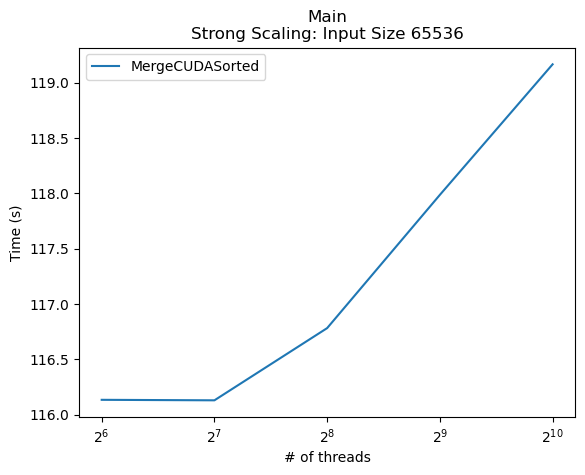

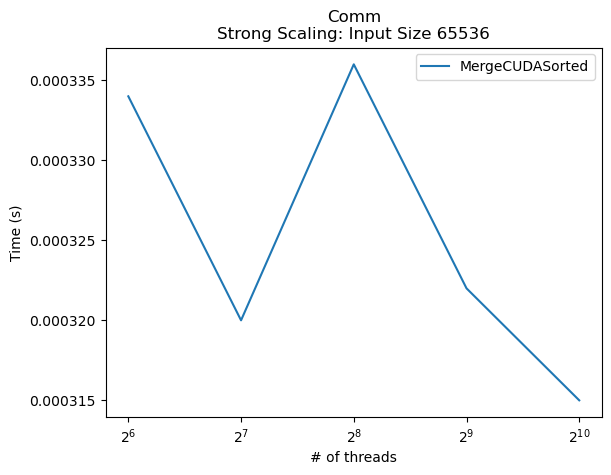

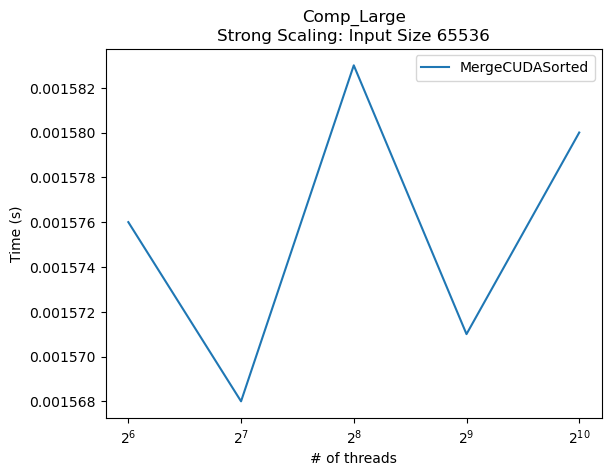

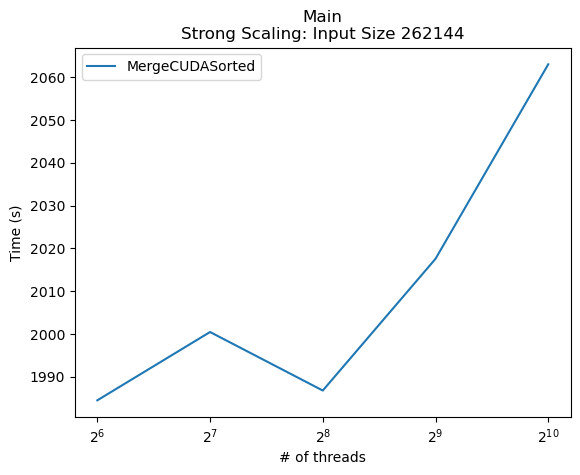

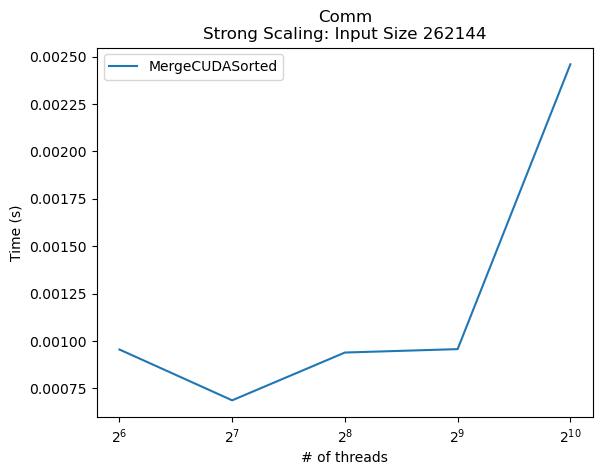

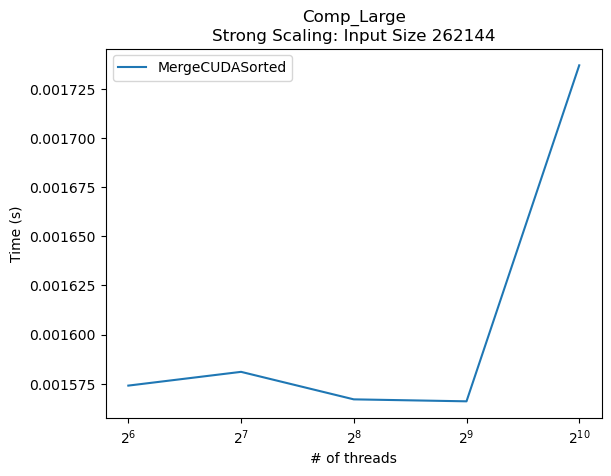

In [33]:
def plot_strong_scaling(algos, num_vals, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    for k in algos.keys():
        dframe = algos[k]
        xvals = dframe['num_threads']
        yvals = dframe[num_vals][time_type]
        ax.plot(xvals, yvals, label=k)
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

for val in values:
    plot_strong_scaling(algosMainCUDA, val, 'Avg time/rank', 'Main\nStrong Scaling: Input Size ' + str(val), '# of threads', 'Time (s)')
    plot_strong_scaling(algosCommCUDA, val, 'Avg time/rank', 'Comm\nStrong Scaling: Input Size ' + str(val), '# of threads', 'Time (s)')
    plot_strong_scaling(algosCompCUDA, val, 'Avg time/rank', 'Comp_Large\nStrong Scaling: Input Size ' + str(val), '# of threads', 'Time (s)')

Plot strong scaling speedup

In [113]:
def plot_strong_scaling_speedup(algoname, algo, values, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    xvals = algo['num_procs']
    
    for val in values:
        vals_list = list(algo[val][time_type])
        yvals = [vals_list[0] / currVal for currVal in vals_list]
        ax.plot(xvals, yvals, label=str(val))
    
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

MPI

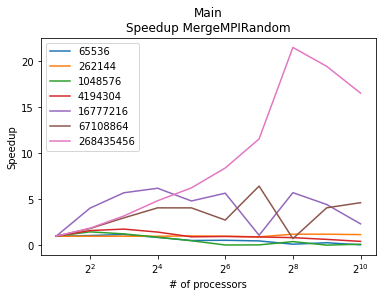

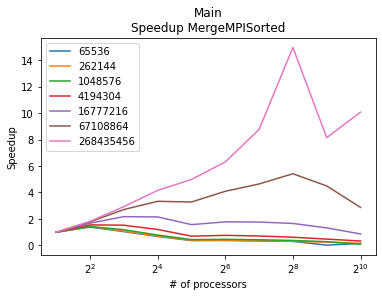

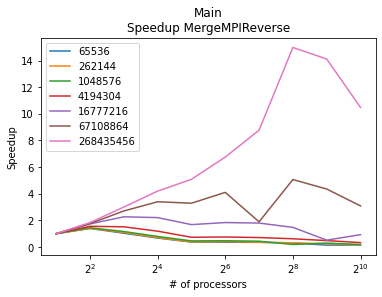

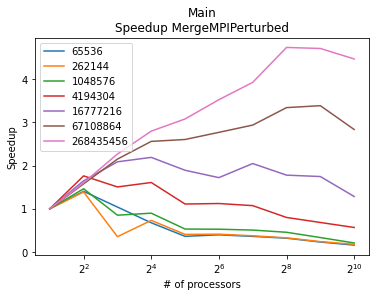

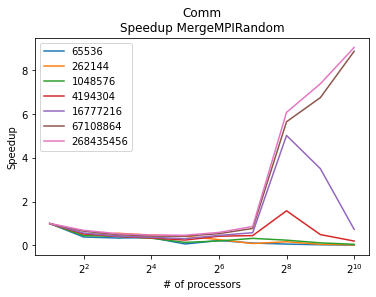

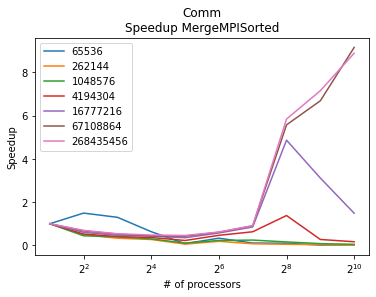

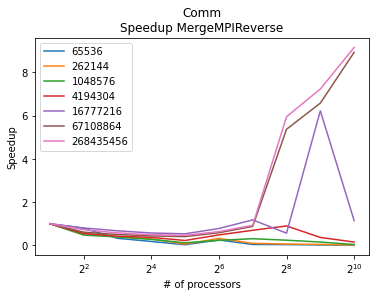

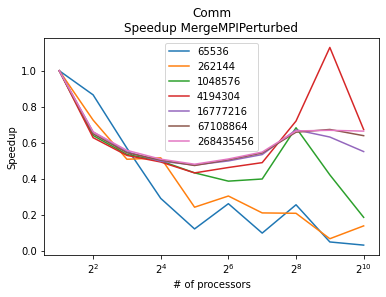

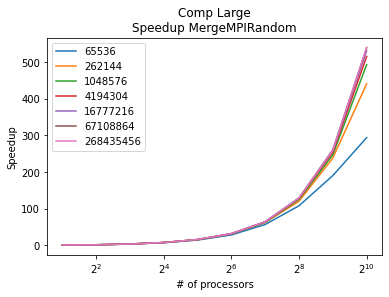

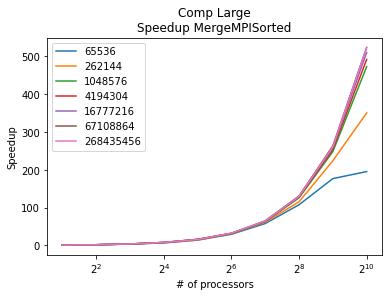

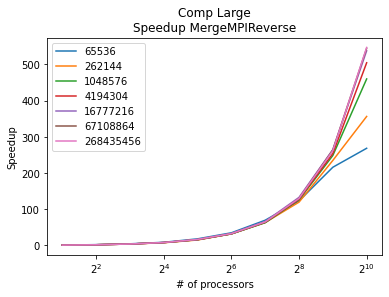

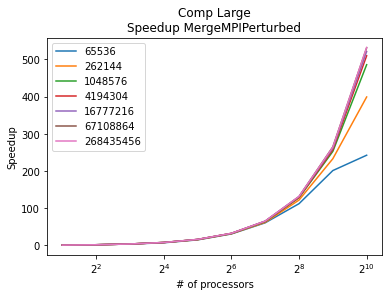

In [114]:
for key in algosMain.keys():
    plot_strong_scaling_speedup(key, algosMain[key], values, 'Avg time/rank', 'Main\nSpeedup ' + key, '# of processors', 'Speedup')
    
for key in algosComm.keys():
    plot_strong_scaling_speedup(key, algosComm[key], values, 'Avg time/rank', 'Comm\nSpeedup ' + key, '# of processors', 'Speedup')
    
for key in algosComp.keys():
    plot_strong_scaling_speedup(key, algosComp[key], values, 'Avg time/rank', 'Comp Large\nSpeedup ' + key, '# of processors', 'Speedup')

CUDA

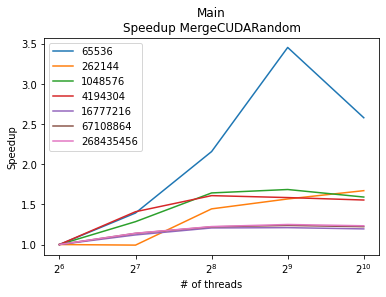

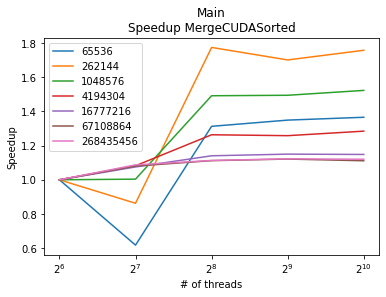

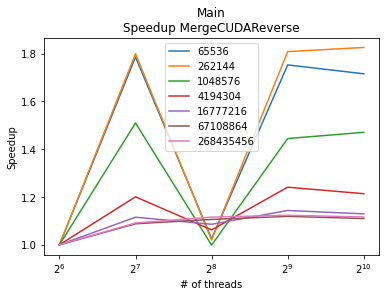

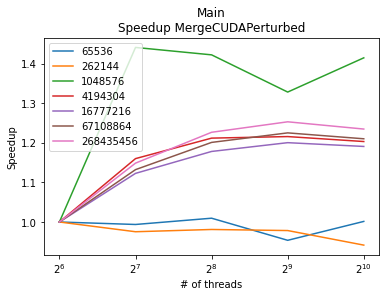

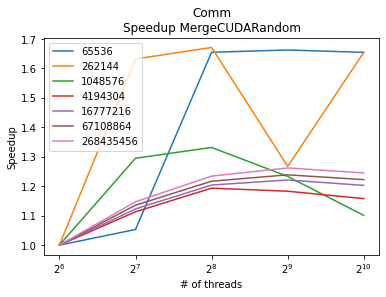

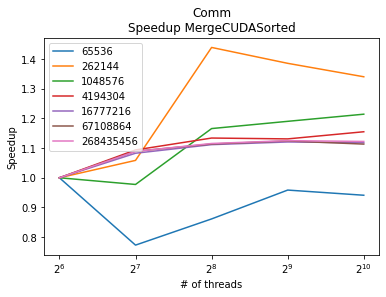

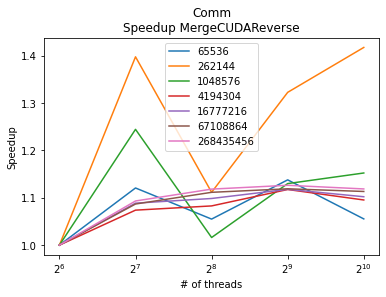

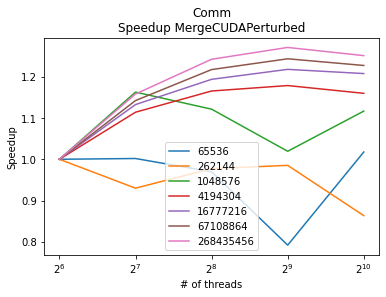

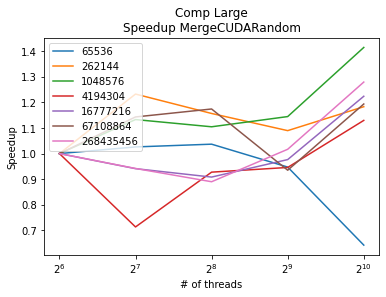

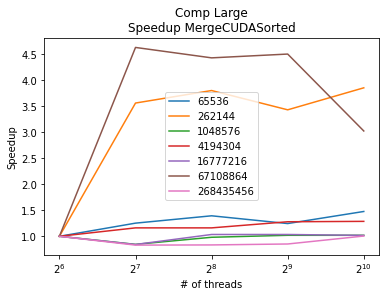

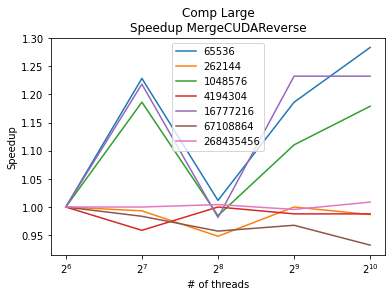

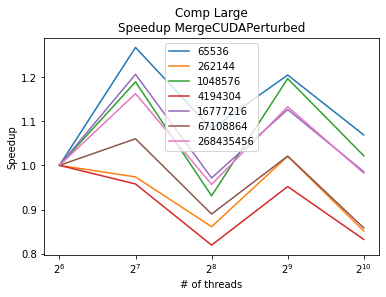

In [116]:
for key in algosMainCUDA.keys():
    plot_strong_scaling_speedup(key, algosMainCUDA[key], values, 'Avg time/rank', 'Main\nSpeedup ' + key, '# of threads', 'Speedup')
    
for key in algosCommCUDA.keys():
    plot_strong_scaling_speedup(key, algosCommCUDA[key], values, 'Avg time/rank', 'Comm\nSpeedup ' + key, '# of threads', 'Speedup')
    
for key in algosCompCUDA.keys():
    plot_strong_scaling_speedup(key, algosCompCUDA[key], values, 'Avg time/rank', 'Comp Large\nSpeedup ' + key, '# of threads', 'Speedup')

Plot weak scaling

In [117]:
def plot_weak_scaling(algoname, algo, values, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    xvals = [2, 8, 32, 128, 512]
    sizePerXVal = [2**20, 2**22, 2**24, 2**26, 2**28]
    yvals = []
    for idx, val in enumerate(sizePerXVal):
        correctNumProcs = algo.loc[algo['num_procs'] == xvals[idx]]
        times = correctNumProcs[val][time_type]
        yvals.append(float(times.iloc[0]))
    
    ax.plot(xvals, yvals, label = algoname)
    
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

def plot_weak_scaling_CUDA(algoname, algo, values, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    xvals = [64, 512, 1024]
    sizePerXVal = [2**24, 2**26, 2**28]
    yvals = []
    for idx, val in enumerate(sizePerXVal):
        correctNumProcs = algo.loc[algo['num_procs'] == xvals[idx]]
        times = correctNumProcs[val][time_type]
        yvals.append(float(times.iloc[0]))
    
    ax.plot(xvals, yvals, label = algoname)
    
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

MPI

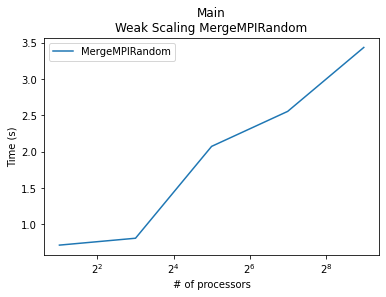

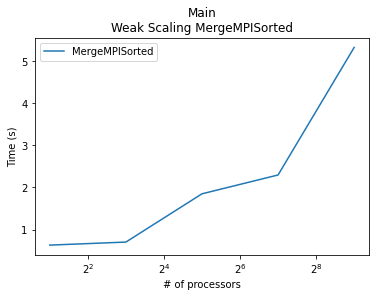

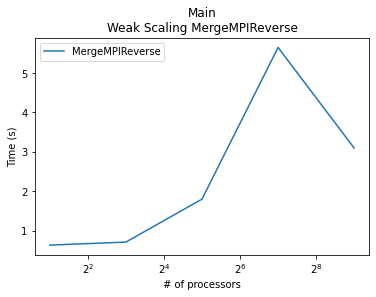

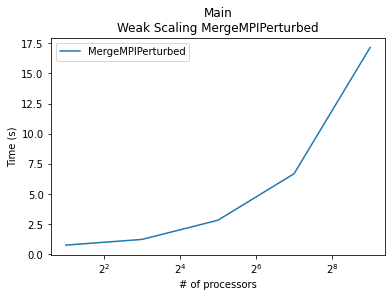

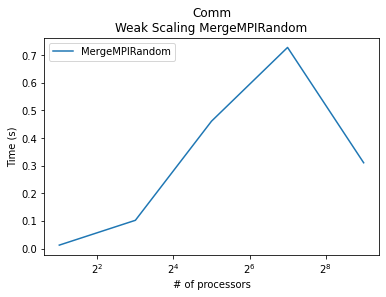

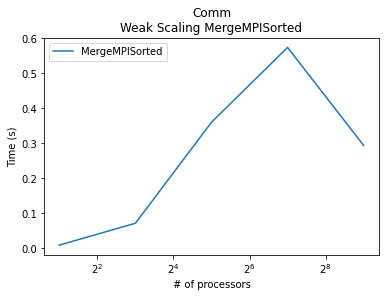

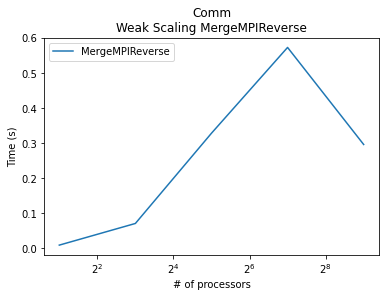

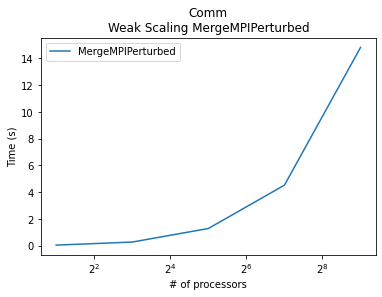

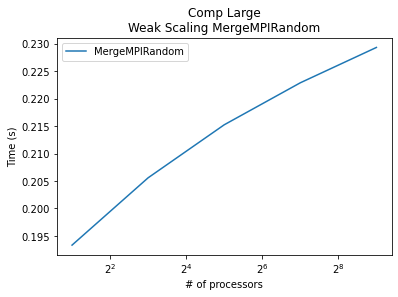

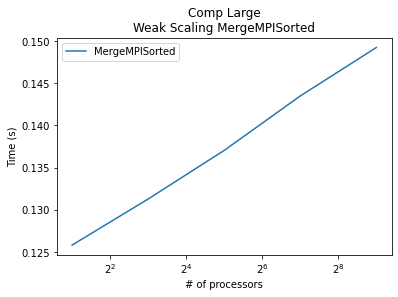

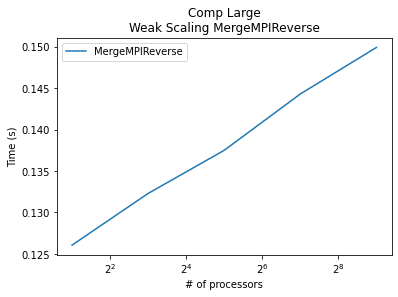

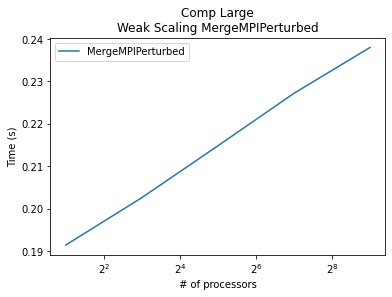

In [115]:
for key in algosMain.keys():
    plot_weak_scaling(key, algosMain[key], values, 'Avg time/rank', 'Main\nWeak Scaling ' + key, '# of processors', 'Time (s)')

for key in algosComm.keys():
    plot_weak_scaling(key, algosComm[key], values, 'Avg time/rank', 'Comm\nWeak Scaling ' + key, '# of processors', 'Time (s)')

for key in algosComp.keys():
    plot_weak_scaling(key, algosComp[key], values, 'Avg time/rank', 'Comp Large\nWeak Scaling ' + key, '# of processors', 'Time (s)')

CUDA

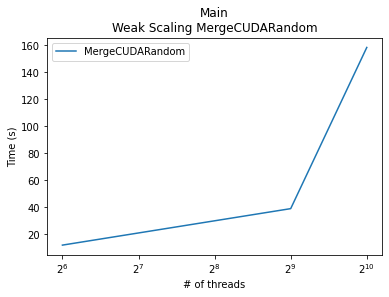

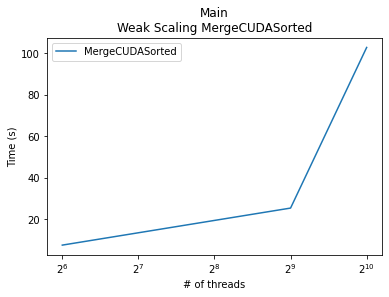

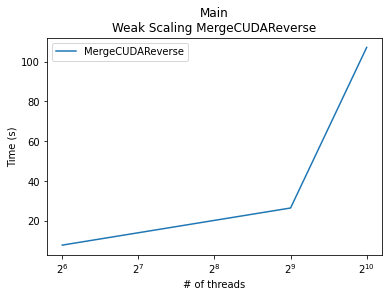

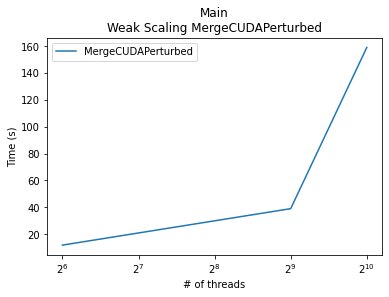

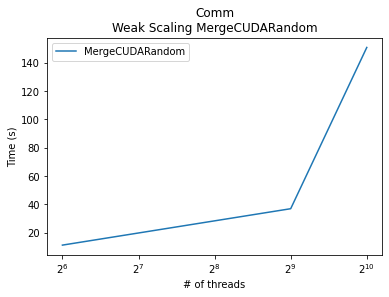

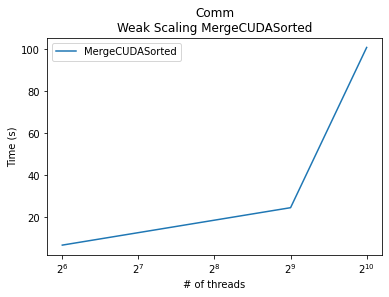

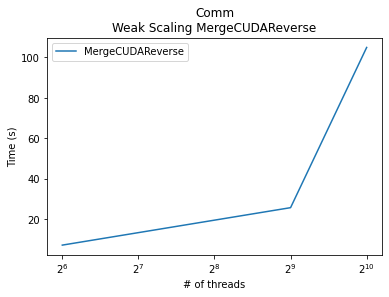

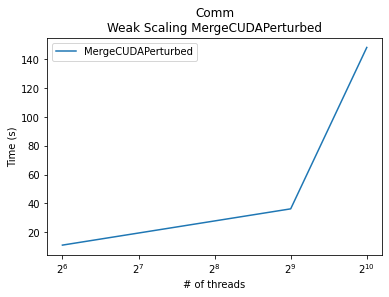

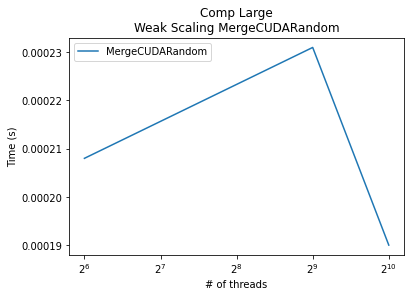

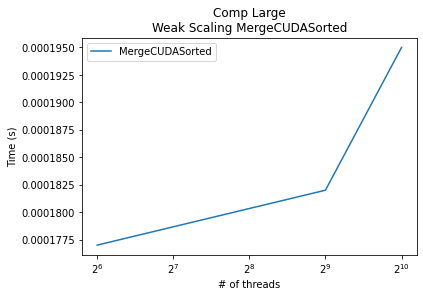

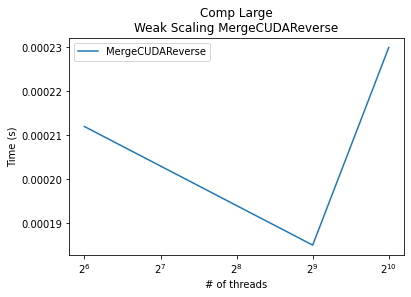

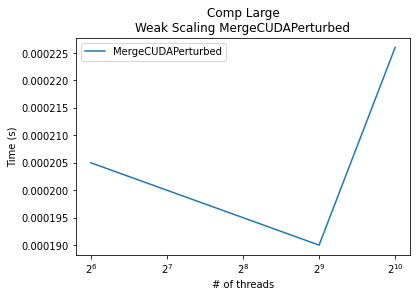

In [119]:
for key in algosMainCUDA.keys():
    plot_weak_scaling_CUDA(key, algosMainCUDA[key], values, 'Avg time/rank', 'Main\nWeak Scaling ' + key, '# of threads', 'Time (s)')

for key in algosCommCUDA.keys():
    plot_weak_scaling_CUDA(key, algosCommCUDA[key], values, 'Avg time/rank', 'Comm\nWeak Scaling ' + key, '# of threads', 'Time (s)')

for key in algosCompCUDA.keys():
    plot_weak_scaling_CUDA(key, algosCompCUDA[key], values, 'Avg time/rank', 'Comp Large\nWeak Scaling ' + key, '# of threads', 'Time (s)')